# Predator-Prey Simulation with Lotka-Volterra Model

This notebook demonstrates a basic implementation of the Lotka-Volterra predator-prey model using Python.

## Project Setup

### Prerequisites
- Python 3.11.8 (what we used) or higher
- Git (optional, for cloning the repository)

### Environment Setup

1. **Create a virtual environment**:
   ```bash
   python -m venv env
   ```

2. **Activate the virtual environment**:
     ```bash
     .\env\Scripts\activate
     ```

3. **Install required dependencies**:
   ```bash
   pip install numpy matplotlib scipy

   # Or use requirements.txt if available
   pip install -r requirements.txt
   ```

## Model Overview

The Lotka-Volterra model consists of a pair of first-order non-linear differential equations that describe the dynamics of biological systems in which two species interact as predator and prey:

- **Prey population (x)**: $\frac{dx}{dt} = \alpha x - \beta xy$
- **Predator population (y)**: $\frac{dy}{dt} = \delta xy - \gamma y$

Where:
- $\alpha$ = Prey growth rate
- $\beta$ = Prey consumption rate
- $\delta$ = Predator growth rate from consuming prey
- $\gamma$ = Predator death rate

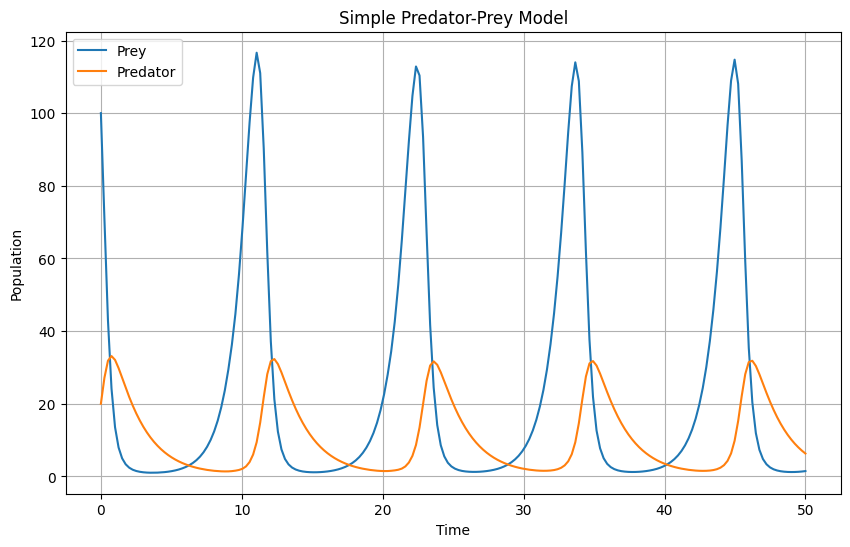


Simple Dataset:
Time	Prey	Predator
0.00	100.00	20.00
0.25	70.93	27.15
0.50	42.94	31.85
0.75	24.21	33.13
1.01	13.55	32.07
1.26	7.95	29.82
1.51	4.98	27.15
1.76	3.34	24.44
2.01	2.40	21.86
2.26	1.83	19.49
2.51	1.49	17.33
2.76	1.27	15.39
3.02	1.13	13.65
3.27	1.05	12.11
3.52	1.02	10.73
3.77	1.01	9.51
4.02	1.04	8.43
4.27	1.09	7.48
4.52	1.18	6.63
4.77	1.30	5.89
5.03	1.45	5.23
5.28	1.65	4.65
5.53	1.90	4.13
5.78	2.21	3.68
6.03	2.61	3.29
6.28	3.10	2.94
6.53	3.71	2.64
6.78	4.48	2.38
7.04	5.44	2.15
7.29	6.65	1.95
7.54	8.16	1.79
7.79	10.04	1.65
8.04	12.40	1.54
8.29	15.35	1.45
8.54	19.04	1.40
8.79	23.65	1.37
9.05	29.38	1.38
9.30	36.27	1.45
9.55	44.79	1.58
9.80	55.57	1.77
10.05	68.53	2.11
10.30	82.94	2.76
10.55	97.39	3.95
10.80	109.78	6.01
11.06	116.64	9.41
11.31	111.04	14.81
11.56	90.26	21.79
11.81	61.73	28.16
12.06	37.17	31.72
12.31	21.22	32.31
12.56	12.32	30.92
12.81	7.44	28.64
13.07	4.80	26.03
13.32	3.31	23.42
13.57	2.44	20.95
13.82	1.91	18.68
14.07	1.57	16.62
14.32	1.36	14.77
14.57	1.23	13.11
14

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lotka-Volterra equations as a function
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Define the parameters
alpha = 1.0   # Prey growth rate
beta = 0.1    # Prey consumption rate
delta = 0.02  # Predator growth rate
gamma = 0.5   # Predator death rate

# Define the initial conditions [prey, predator]
initial_conditions = [100, 20]

# Define the time span for the simulation
time_span = np.linspace(0, 50, 200) # Simulate for 50 time units with 200 points

# Solve the differential equations
solution = solve_ivp(lotka_volterra, [time_span[0], time_span[-1]], initial_conditions,
                     args=(alpha, beta, delta, gamma), dense_output=True)

# Evaluate the solution at the specified time points
prey_population, predator_population = solution.sol(time_span)

# Create a simple dataset (this is based on the model output)
time_data = time_span
prey_data = prey_population
predator_data = predator_population

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_data, prey_data, label='Prey')
plt.plot(time_data, predator_data, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Simple Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()

# You can also print the simple dataset if needed
print("\nSimple Dataset:")
print("Time\tPrey\tPredator")
for t, p, d in zip(time_data, prey_data, predator_data):
    print(f"{t:.2f}\t{p:.2f}\t{d:.2f}")

## Results Analysis

The simulation demonstrates the classic oscillating behavior of predator and prey populations:

1. When prey population increases, predators get more food and their population grows
2. As predator population increases, they consume more prey, causing prey population to decline
3. With fewer prey available, predator population begins to decline due to starvation
4. With fewer predators, prey population begins to recover, starting the cycle again

The phase space plot (bottom graph) shows this cyclical relationship as a closed loop, indicating a stable system that will continue cycling indefinitely under these parameters.

## Further Explorations

Try modifying the parameters to see how they affect the system dynamics:
- Increase/decrease prey growth rate (alpha)
- Change the predator death rate (gamma)
- Modify the initial population values